Le chargement a nécessité le package : ChemmineR


Attachement du package : ‘igraph’


L'objet suivant est masqué depuis ‘package:ChemmineR’:

    groups


Les objets suivants sont masqués depuis ‘package:stats’:

    decompose, spectrum


L'objet suivant est masqué depuis ‘package:base’:

    union




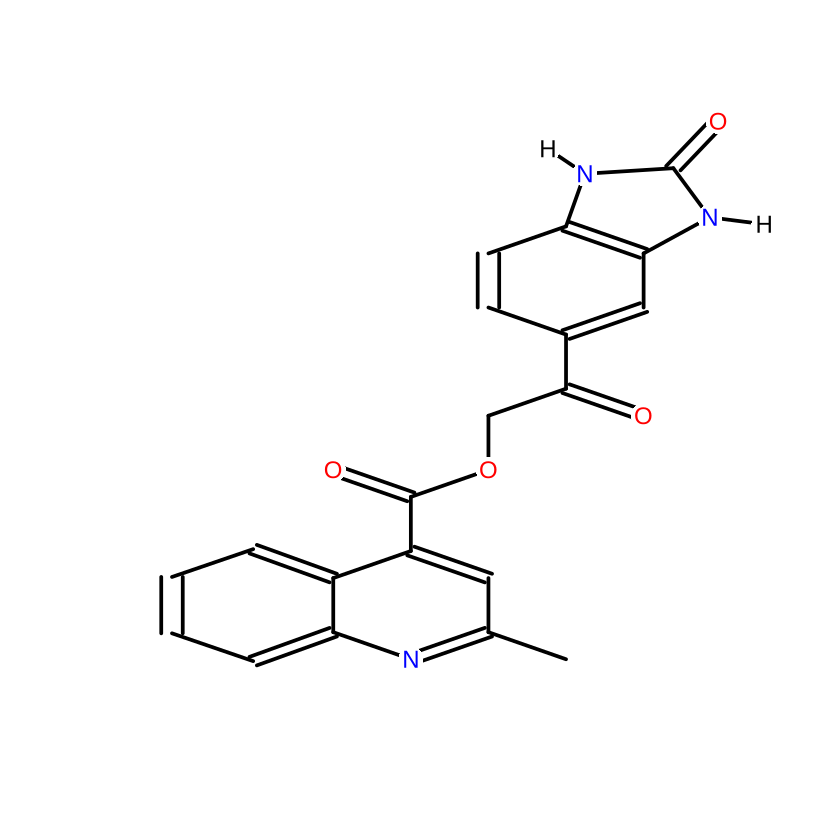

In [1]:
# Load required libraries
library(fmcsR)
library(igraph)
#library(furrr)
#library(purrr)
library(ChemmineR)
library(ChemmineOB)
#plan(multicore, workers = 12)
smiles_to_inchikey <- function(smiles) {
    # Convert SMILES to mol object
    inchikey <-trimws(convertFormat("SMILES","INCHIKEY",smiles))
    return(inchikey)
}
inchikeys <- c(smiles_to_inchikey("Cc1cc(C(=O)OCC(=O)c2ccc3[nH]c(=O)[nH]c3c2)c2ccccc2n1
"))

inchikey_query <- pubchemInchikey2sdf(inchikeys)

# successful queries
inchikey_query_index <- inchikey_query$sdf_index[inchikey_query$sdf_index != 0]

# get CID of these queries
inchikey_query_cid <- cid(inchikey_query$sdf_set[inchikey_query_index])
names(inchikey_query_cid) <- names(inchikey_query_index)
ligand <- inchikey_query$sdf_set[[1]]
plot(ligand, print = FALSE)

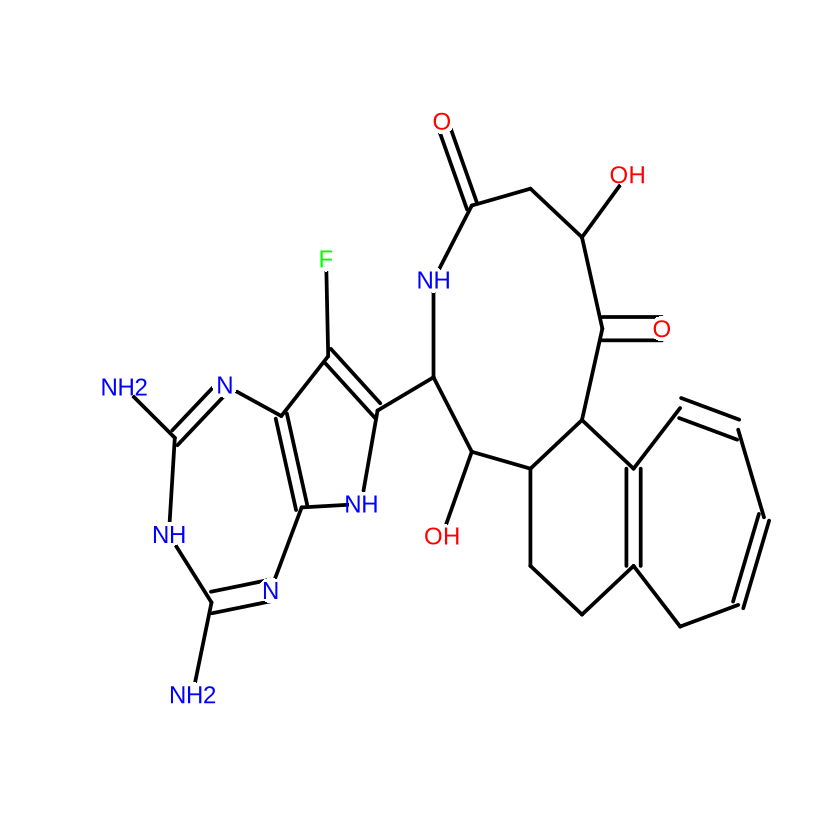

In [16]:
ligand = read.SDFset("../1_4YVG_SAM_ligand_gen.sdf")[[24]]
plot(ligand, print = FALSE,regenCoords=TRUE)

In [3]:
listCMTools()

Category,Name,Input,Output
<chr>,<chr>,<chr>,<chr>
Upload,Upload CSV Data,character,data.frame
Upload,Upload Tab Delimited Data,character,data.frame
Properties,JoeLib Descriptors,SDFset,data.frame
Properties,OpenBabel Descriptors,SDFset,data.frame
Clustering,Binning Clustering,SDFset,character
Clustering,Multidimensional Scaling (MDS),SDFset,character
Clustering,Numeric Data Clustering,SDFset,character
Clustering,Hierarchical Clustering,SDFset,character
Search,pubchemID2SDF,data.frame,SDFset


In [4]:
toolDetails("PubChem Fingerprint Search")

Category:		Search
Name:			PubChem Fingerprint Search
Input R Object:		SDFset
Input mime type:	chemical/x-mdl-sdfile
Output R Object:	integer
Output mime type:	text/fp.search.result
###### BEGIN DESCRIPTION ######
PubChem Fingerprint Search
####### END DESCRIPTION #######
Option 1: 'Similarity Cutoff'
Allowed Values:  '0.5' '0.6' '0.7' '0.8' '0.85' '0.9' '0.91' '0.92' '0.93' '0.94' '0.95' '0.96' '0.97' '0.98' '0.99'
Option 2: 'Max Compounds Returned'
Allowed Values:  '10' '50' '100' '200' '1000'
Example function call:
	job <- launchCMTool(
		'PubChem Fingerprint Search',
		SDFset,
		'Similarity Cutoff'='0.5',
		'Max Compounds Returned'='10'
	)


In [5]:
job1 <- launchCMTool(
    "PubChem Fingerprint Search", # nolint: indentation_linter.
    ligand,
    "Similarity Cutoff" = "0.7",
    "Max Compounds Returned" = "200"
)
result1 <- ChemmineR::result(job1)
result1

[1] 135409409 135449327 135445969 147289591   6439337  44481493 135407786
  [8]    460230   5327470  10181237    460235    460236    462786   5327530
 [15]  24812713  44481769   6538727    453090    453544   5479301   9853618
 [22]  10418715  10763745  14803056  44300430  44327449 135620613 136144120
 [29] 136144121 136179524   9846311  23656920 135950209 135950240 135966076
 [36] 136076371 122507161    163918    462819 155817492    451797    456657
 [43]    489372    489373   5480581   5480965  10100580  10254053  13384553
 [50]  13877790  13996493  14991489  16136126  16141162  16203669  44297620
 [57]  44297662  44297663  44297670  44300358  44300412  44300431  44315575
 [64]  44322787  44332763  44340210  44344921  44348762  44348771  44348772
 [71]  44348919  44348959  44381148  44629671  46206425  46206426  56661235
 [78]  70690621  70692762  90662804 118718351 118718779 118718780 118718787
 [85] 118718793 118718794 136076372 136076373 136179617 136179618 139589767
 [92]  44592417    196953 135798510 162658165  10030228  73333515 118341325
 [99] 118341424 118348187 118348281 118547092 118547101 118547117 122507130
[106] 122507134 122507159 122507176 122507184 124140227 132007700 134582088
[113] 136962959 137082731 146968258 147051002 147119620 147227272 147257822
[120] 147289590 147811848 148368802 148939757 149333491 149557842 149934848
[127] 152216407 152848683 152965822 153007505 153079218 153619935 153619950
[134] 153619970 153619974 153619978 153619982 153620015 153620049 153620065
[141] 153620081 153620085 153620111 153620129 154941550 154941552 154941558
[148] 154961008 154961013 154961019 154961124 154961130 154961231 154961232
[155] 154961636 154961639 154961641 154961687 154961808 156816021 162687606
[162] 162687658 135566779  16086884  44305239  44323663  44323972  44323975
[169]  44461038  46226803  46881190  56657663 118734977 135402049 156582736
[176]  78224689 135927342    489377   5481649  44287816  44287821  44287883
[183]  44288115  44298391  44379570  51361008  71460381  72705066  73333514
[190]  73333613  73333614  73348947  91899284  91899288  91899313 122184259
[197] 122185112 122185113 122185115 122193055

In [6]:
job2 <- launchCMTool("pubchemID2SDF", result1)
result2 <- ChemmineR::result(job2)
result2

An instance of "SDFset" with 200 molecules

In [7]:
target <- SDFset(append(ligand,result2@SDF))
target

An instance of "SDFset" with 201 molecules

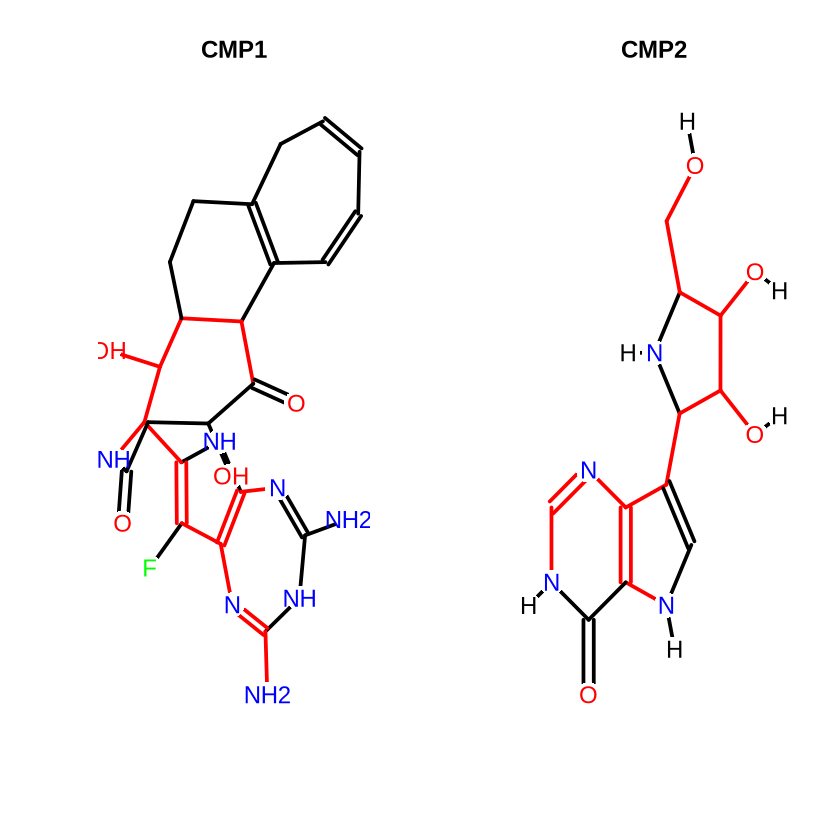

In [8]:
data(fmcstest) # Loads test sdfset object
test <- fmcs(ligand, result2[[1]], au = 2, bu = 1)
plotMCS(test) # Plots both query compounds with MCS in color

In [10]:
compute_graph <- function(ligands, similarity, threshold, n_turnes) {
    n_ligands <- length(ligands@SDF)
    # Create a boolean matrix to track which pairs have been computed
    is_computed <- matrix(FALSE, nrow=n_ligands, ncol=n_ligands)
    # Diagonal is always computed (self-similarity)
    diag(is_computed) <- TRUE
    graph <- make_empty_graph()
    graph <- add_vertices(graph, 1, id=1)
    
    for (k in 1:n_turnes) {
        print(paste("turn", k))
        len <- length(V(graph))
        for (i in seq_along(ligands@SDF)) {
            if (!(i %in% V(graph)$id)) {
                test_node <- ligands[[i]]
                
                for (id_j in 1:len) {
                    j = V(graph)$id[id_j]
                    if (!is_computed[i, j]) {
                        s <- similarity(test_node, ligands[[j]])
                        is_computed[i, j] <- TRUE
                        is_computed[j, i] <- TRUE
                        
                        if (s > threshold) {
                            #print(paste("adding edge", i, j,id_j,len, length(V(graph))))
                            graph <- add_vertices(graph, 1, id=i)
                            graph <- add_edges(graph, edges = c(id_j, length(V(graph))), 
                                            similarity = s)

                            break
                        }
                    }
                }
            }
        }
    }
    return(graph)
}


[1] "turn 1"


Warning message in fmcs(x1, x2, au = 2, bu = 1, fast = TRUE):
“FMCS did not complete, timeout of 60000ms exceeded”
Warning message in fmcs(x1, x2, au = 2, bu = 1, fast = TRUE):
“FMCS did not complete, timeout of 60000ms exceeded”
Warning message in fmcs(x1, x2, au = 2, bu = 1, fast = TRUE):
“FMCS did not complete, timeout of 60000ms exceeded”
Warning message in fmcs(x1, x2, au = 2, bu = 1, fast = TRUE):
“FMCS did not complete, timeout of 60000ms exceeded”
Warning message in fmcs(x1, x2, au = 2, bu = 1, fast = TRUE):
“FMCS did not complete, timeout of 60000ms exceeded”
Warning message in fmcs(x1, x2, au = 2, bu = 1, fast = TRUE):
“FMCS did not complete, timeout of 60000ms exceeded”
Warning message in fmcs(x1, x2, au = 2, bu = 1, fast = TRUE):
“FMCS did not complete, timeout of 60000ms exceeded”
Warning message in fmcs(x1, x2, au = 2, bu = 1, fast = TRUE):
“FMCS did not complete, timeout of 60000ms exceeded”
Warning message in fmcs(x1, x2, au = 2, bu = 1, fast = TRUE):
“FMCS did not comp

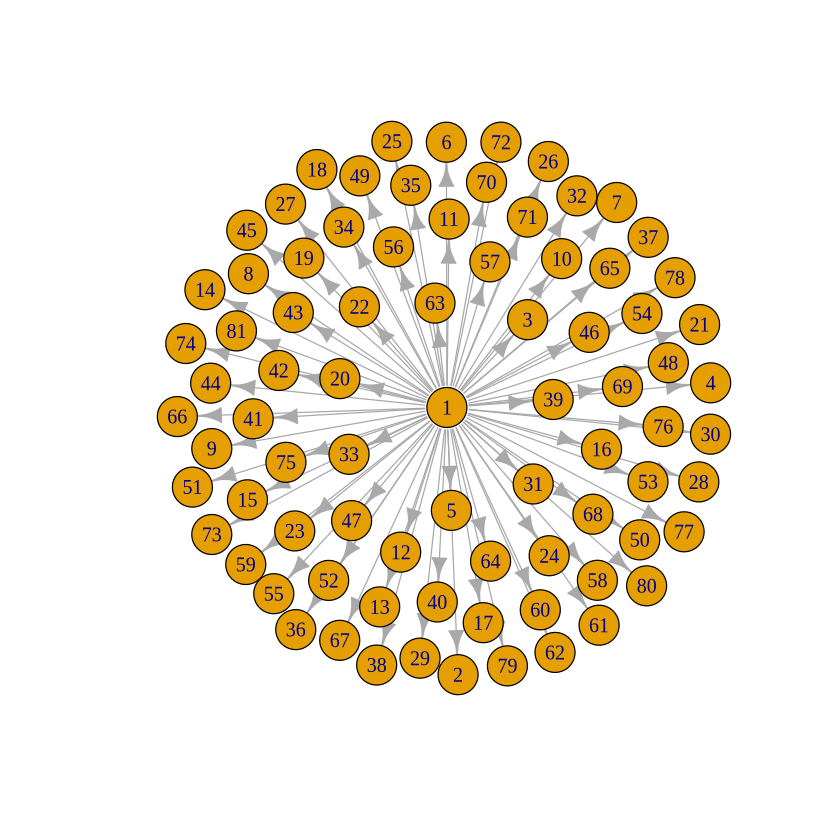

In [11]:
g <- compute_graph(target, function(x1, x2) {
    return(fmcs(x1, x2, au = 2, bu = 1, fast = TRUE)[["Tanimoto_Coefficient"]])
}, threshold = .4, n_turnes = 1)
plot(g)

In [12]:
write.SMI(sdf2smiles(target[V(g)$id]),"out.smi")

In [25]:
plotMCS(fmcs(target[V(g)$id[1]], target[V(g)$id[2]], au = 2, bu = 1),regenCoords=TRUE,asp=2)

ERROR: Error in parse(text = input): <text>:1:89: '=' inattendu(e)
1: plotMCS(fmcs(target[V(g)$id[1]], target[V(g)$id[2]], au = 2, bu = 1),regenCoords=TRUEasp=
                                                                                            ^


In [9]:
write_graph(g,"../similarity_graph.graphml",format = "graphml")

ERROR: Error: objet 'g' introuvable
